# Breast Cancer Classification with XGBoost

<p align="center">
        <img src="title.PNG" width="1000"/>
</p>

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from private_path import data_path

#### Data Handling

In [2]:
# dataset is taken from
# https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
# load dataset 
df = pd.read_csv(data_path)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [3]:
# Drop unecessary column 
df = df.drop(['id', 'Unnamed: 32'], axis=1)
df.shape

(569, 31)

<AxesSubplot:xlabel='label', ylabel='count'>

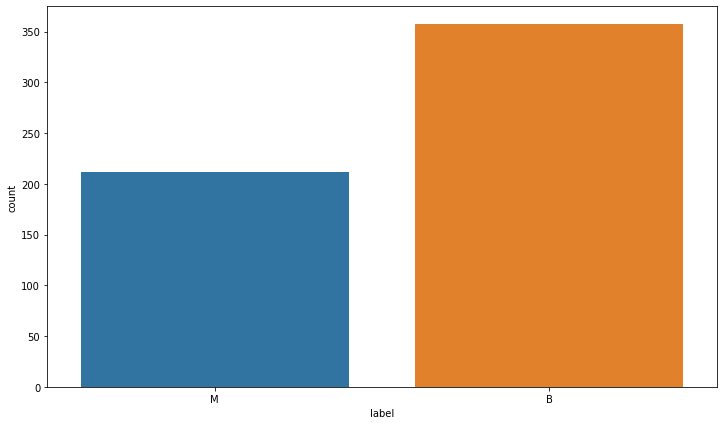

In [4]:
# Rename label column
df = df.rename(columns={'diagnosis':'label'})
# Check distribution of labels
plt.figure(figsize=(12,7))
sns.countplot(x='label', data=df)

In [5]:
# define the dependent variable 
y = df['label'].values
# transform m/b label to 0/1
labelencoder = LabelEncoder()
labelencoder.fit(['B','M'])
Y = labelencoder.transform(y)
print(f'{y[200:210]} converted to {Y[200:210]}!')

['B' 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B'] converted to [0 1 1 1 0 1 0 1 0 0]!


In [12]:
# drop label column in data
X = df.drop('label', axis=1)
# Normalize Data
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
# train-test-split the data to 85% train and 15% test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
print('Data Handling done!')

Data Handling done!


#### Build Model

In [7]:
model = XGBClassifier(use_label_encoder=False)
# train model
model.fit(X_train, y_train)

[15:00:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

#### Evaluate Model

In [8]:
# predict test set
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy is {round(acc*100, 2)}%!')

Accuracy is 96.51%!


Classification Report:
----------------------
               precision    recall  f1-score   support

      Benign       0.95      1.00      0.97        54
   Malignant       1.00      0.91      0.95        32

    accuracy                           0.97        86
   macro avg       0.97      0.95      0.96        86
weighted avg       0.97      0.97      0.96        86



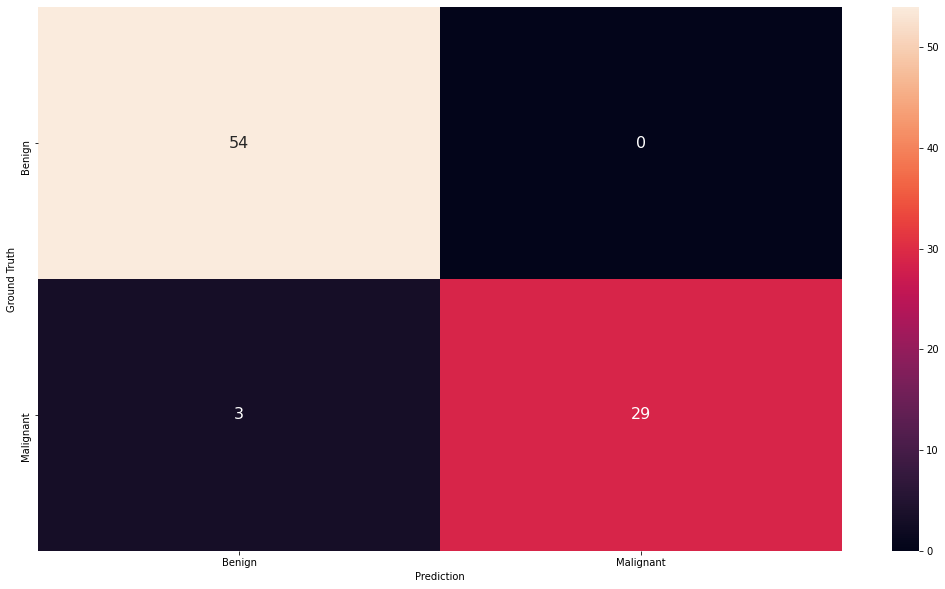

In [11]:
# Build confusion matrix
y_test = ['Benign' if x == 0 else 'Malignant' for x in y_test]
y_pred = ['Benign' if x == 0 else 'Malignant' for x in y_pred]

cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, columns=np.unique(y_test), index=np.unique(y_test))
df_cm.index.name = 'Ground Truth'
df_cm.columns.name = 'Prediction'

plt.figure(figsize=(18,10))
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16})
# Print Classification Report
clr = classification_report(y_test, y_pred)
print("Classification Report:\n----------------------\n", clr)